# Unit 5 - Financial Planning

In [64]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [65]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [66]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [67]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [68]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)

# Fetch current ETH price
eth_response_data = requests.get(eth_url)

#set data to json format
import json
btc_data = btc_response_data.json()
eth_data = eth_response_data.json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120516982,
   'total_supply': 120516982,
   'max_supply': 120516982,
   'quotes': {'USD': {'price': 1593.46,
     'volume_24h': 12558089153,
     'market_cap': 192137776119,
     'percentage_change_1h': -0.179901621537743,
     'percentage_change_24h': 2.71320157774099,
     'percentage_change_7d': 5.07084181842464,
     'percent_change_1h': -0.179901621537743,
     'percent_change_24h': 2.71320157774099,
     'percent_change_7d': 5.07084181842464}},
   'last_updated': 1674752345}},
 'metadata': {'timestamp': 1674752345,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [69]:
# Locate price of BTC from json dataset
print(json.dumps(btc_data, indent=4))
btc_last_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

print()
print(btc_last_price)

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19273300,
            "total_supply": 19273300,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 22988.0,
                    "volume_24h": 46478361588,
                    "market_cap": 443533131145,
                    "percentage_change_1h": -0.164621349808737,
                    "percentage_change_24h": 1.46880064627554,
                    "percentage_change_7d": 10.9093150695351,
                    "percent_change_1h": -0.164621349808737,
                    "percent_change_24h": 1.46880064627554,
                    "percent_change_7d": 10.9093150695351
                }
            },
            "last_updated": 1674752380
        }
    },
    "metadata": {
        "timestamp": 1674752380,
        "num_crypt

In [70]:
# Locate price of ETH from json dataset
print(json.dumps(eth_data, indent=4))
eth_last_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

print()
print(eth_last_price)

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120516982,
            "total_supply": 120516982,
            "max_supply": 120516982,
            "quotes": {
                "USD": {
                    "price": 1593.46,
                    "volume_24h": 12558089153,
                    "market_cap": 192137776119,
                    "percentage_change_1h": -0.179901621537743,
                    "percentage_change_24h": 2.71320157774099,
                    "percentage_change_7d": 5.07084181842464,
                    "percent_change_1h": -0.179901621537743,
                    "percent_change_24h": 2.71320157774099,
                    "percent_change_7d": 5.07084181842464
                }
            },
            "last_updated": 1674752345
        }
    },
    "metadata": {
        "timestamp": 1674752345,
       

In [71]:
# Compute current value of my crpto
my_btc_value = btc_last_price * my_btc
my_eth_value = eth_last_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print()
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27585.60

The current value of your 5.3 ETH is $8445.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [72]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [73]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [74]:
# Format current date as ISO format --3years
start_date = pd.Timestamp("2020-01-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-25", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-01-27 05:00:00+00:00,114.14,114.1600,114.0470,114.14,4790076,12055,114.123364,AGG
2020-01-28 05:00:00+00:00,114.10,114.1600,113.9501,114.04,4463823,11954,114.028981,AGG
2020-01-29 05:00:00+00:00,114.13,114.3500,114.1108,114.30,2890247,10583,114.244526,AGG
2020-01-30 05:00:00+00:00,114.28,114.5400,114.2350,114.31,6885551,19279,114.380590,AGG
2020-01-31 05:00:00+00:00,114.48,114.6667,114.3800,114.65,5061895,15685,114.555973,AGG
...,...,...,...,...,...,...,...,...
2023-01-19 05:00:00+00:00,389.36,391.0800,387.2600,388.64,87066127,549053,389.264685,SPY
2023-01-20 05:00:00+00:00,390.10,396.0400,388.3800,395.88,91806356,505915,392.598891,SPY
2023-01-23 05:00:00+00:00,396.72,402.6450,395.7200,400.63,84187957,568843,399.770552,SPY


In [75]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# where the ticker is = end of that data horizontally in df display
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_ticker.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-01-27 05:00:00+00:00  114.14  114.1600  114.0470  114.14  4790076   
2020-01-28 05:00:00+00:00  114.10  114.1600  113.9501  114.04  4463823   
2020-01-29 05:00:00+00:00  114.13  114.3500  114.1108  114.30  2890247   
2020-01-30 05:00:00+00:00  114.28  114.5400  114.2350  114.31  6885551   
2020-01-31 05:00:00+00:00  114.48  114.6667  114.3800  114.65  5061895   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-01-27 05:00:00+00:00       12055  114.123364  323.03  325.12  322.6600   
2020-01-28 05:00:00+00:00       11954  114.028981  325.07  327.85  323.6038   
2020-01-29 05:00:00+00:00       10583  114.244526  328.38  328.63  326.4000   
2020-01-30 05:00:00+00:00       19279  114.380590  324.36  327.91  323.5400   
2020-01-31 05:00:00+00:00       15685  114.555973  327.00  327.17  320.7300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-01-27 05:00:00+00:00  323.51   84062588      480422  324.143307  
2020-01-28 05:00:00+00:00  326.88   63833953      328817  326.542567  
2020-01-29 05:00:00+00:00  326.62   54040963      303785  327.339296  
2020-01-30 05:00:00+00:00  327.62   75491906      460066  325.589426  
2020-01-31 05:00:00+00:00  321.75  113854677      655050  323.010191

In [76]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][-1]
#agg_close_price
spy_close_price = df_ticker["SPY"]["close"][-1]
spy_close_price

400.35

In [77]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.4
Current SPY closing price: $400.35


In [78]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20017.50
The current value of your 200 AGG shares is $20080.00


### Savings Health Analysis

In [79]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_stock = my_spy_value + my_agg_value
total_crypto = my_btc_value + my_eth_value

savings_data = [total_stock, total_crypto]
columns = ["Amount"]
index = ["stock", "crypto"]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=[index], columns=[columns])


# Display savings DataFrame
display(df_savings)

,Amount
stock,40097.500
crypto,36030.938


<AxesSubplot: title={'center': 'Portfolio Breakdown of Current Assets'}, ylabel='(Amount,)'>

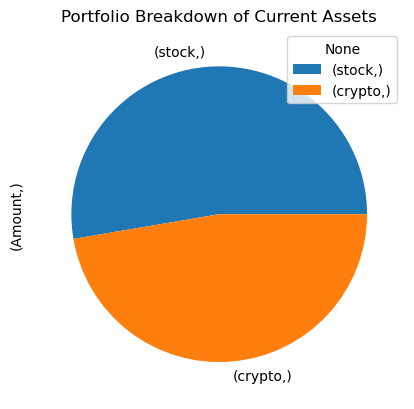

In [80]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="Amount", title="Portfolio Breakdown of Current Assets")

In [81]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_stock + total_crypto

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats!! You have enough in the emergency fund")   
elif total_savings == emergency_fund:
        print("You have just enough in the emergency fun")
elif total_savings < emergency_fund:
        print(f"You are ({total_savings} - {emergency_fund}) away from what you need!")

Congrats!! You have enough in the emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [82]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-26', tz='America/New_York').isoformat()

In [83]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# where the ticker is = end of that data horizontally in df display
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-26 05:00:00+00:00  108.51  108.510  108.27  108.37   3808163   
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18   3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2018-01-26 05:00:00+00:00       13216  108.364405  284.25  286.6285  283.96   
2018-01-29 05:00:00+00:00       17162  108.140754  285.93  286.4300  284.50   
2018-01-30 05:00:00+00:00       14454  108.010293  282.59  284.7360  281.22   
2018-01-31 05:00:00+00:00       29280  108.033072  282.73  283.3000  280.68   
2018-02-01 05:00:00+00:00       26477  107.695566  281.08  283.0600  280.68   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-01-26 05:00:00+00:00  286.56  111502740      267028  285.508779  
2018-01-29 05:00:00+00:00  284.64   90206637      286719  285.443701  
2018-01-30 05:00:00+00:00  281.63  132075557      427207  282.425628  
2018-01-31 05:00:00+00:00  281.91  118954475      363005  281.967347  
2018-02-01 05:00:00+00:00  281.68   90622947      304909  281.766220

In [84]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5, .5],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [85]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-26 05:00:00+00:00  108.51  108.510  108.27  108.37   3808163   
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18   3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-26 05:00:00+00:00       13216  108.364405          NaN  284.25   
2018-01-29 05:00:00+00:00       17162  108.140754    -0.001753  285.93   
2018-01-30 05:00:00+00:00       14454  108.010293    -0.001571  282.59   
2018-01-31 05:00:00+00:00       29280  108.033072     0.000833  282.73   
2018-02-01 05:00:00+00:00       26477  107.695566    -0.005365  281.08   

                                                                            \
                               high     low   close     volume trade_count   
timestamp                                                                    
2018-01-26 05:00:00+00:00  286.6285  283.96  286.56  111502740      267028   
2018-01-29 05:00:00+00:00  286.4300  284.50  284.64   90206637      286719   
2018-01-30 05:00:00+00:00  284.7360  281.22  281.63  132075557      427207   
2018-01-31 05:00:00+00:00  283.3000  280.68  281.91  118954475      363005   
2018-02-01 05:00:00+00:00  283.0600  280.68  281.68   90622947      304909   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-26 05:00:00+00:00  285.508779          NaN  
2018-01-29 05:00:00+00:00  285.443701    -0.006700  
2018-01-30 05:00:00+00:00  282.425628    -0.010575  
2018-01-31 05:00:00+00:00  281.967347     0.000994  
2018-02-01 05:00:00+00:00  281.766220    -0.000816

In [89]:
import warnings
warnings.filterwarnings("ignore")

In [90]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000407,0.997420,0.997846,1.007185,1.001642,0.992215,0.993180,1.004542,1.009483,1.002078,...,1.009205,0.995520,0.997561,1.007991,0.995798,1.002322,1.000257,0.987733,1.002640,1.007913
2,0.993982,0.997375,0.995499,1.003171,0.996053,0.990583,0.981574,1.019221,0.995594,0.996817,...,1.010459,0.987891,1.001743,1.003509,0.986042,1.000137,0.999410,0.984229,1.005851,1.014614
3,0.996718,1.000084,0.993897,1.001694,0.988182,0.990115,0.990344,1.009673,0.996217,0.993269,...,1.022304,0.972513,0.990052,0.994242,0.983397,0.997626,0.994624,0.984995,0.999780,1.020627
4,0.985751,1.000301,0.985013,0.992513,0.981202,0.993456,1.003604,1.011640,0.997450,1.001504,...,1.029073,0.976605,1.005276,0.998340,0.982808,0.991258,0.994249,0.984782,1.004084,1.016380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.735980,2.497878,4.825384,1.438513,10.330726,1.531770,5.172603,3.963844,1.693952,3.661957,...,2.820625,3.165077,3.928950,3.625660,4.987717,6.071132,1.619842,2.080705,0.930670,2.005164
7557,1.727975,2.519722,4.785301,1.436438,10.453012,1.517722,5.152055,4.002898,1.699766,3.601748,...,2.842804,3.154030,3.923208,3.659446,4.952766,6.087652,1.625233,2.087502,0.922878,2.028355
7558,1.719132,2.514242,4.755890,1.450977,10.511470,1.524323,5.142292,4.004585,1.723794,3.634583,...,2.833267,3.157231,3.932168,3.704265,5.033924,6.005204,1.644344,2.087692,0.923244,2.003954
7559,1.731034,2.532452,4.713509,1.452069,10.543403,1.499986,5.204187,4.006541,1.717343,3.648691,...,2.841963,3.164659,3.937218,3.723950,5.015477,5.966195,1.636278,2.102683,0.921095,1.993265


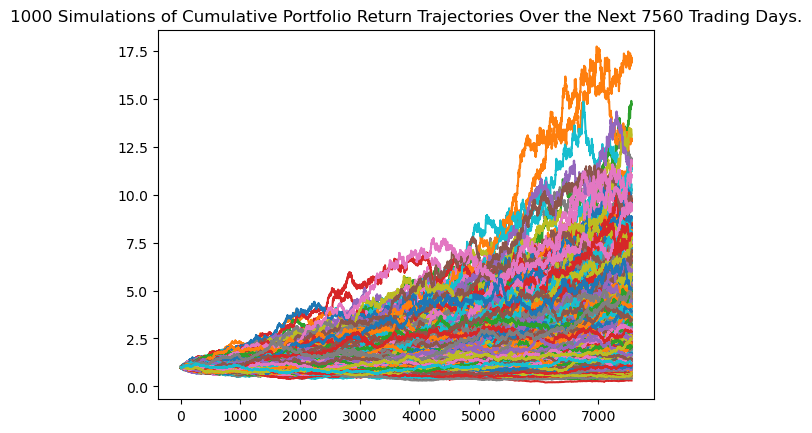

In [87]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

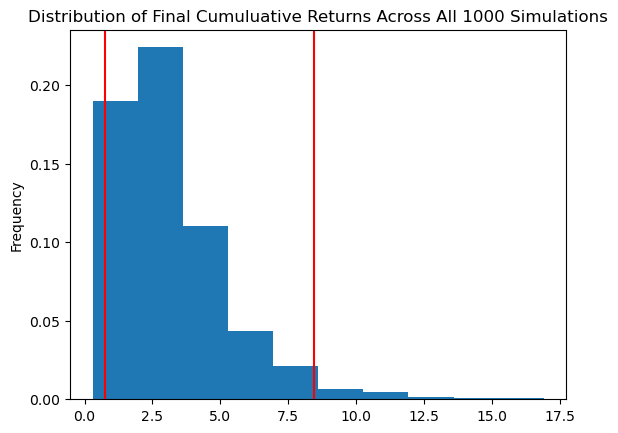

In [88]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           1000.000000
mean               3.057257
std                2.043680
min                0.322406
25%                1.725788
50%                2.646019
75%                3.849780
max               23.606507
95% CI Lower       0.791828
95% CI Upper       7.401899
Name: 7560, dtype: float64


/Users/mikewenner/Desktop/Module_5_Challenge/data/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*20000,2)
ci_upper = round(summary_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $15836.56 and $148037.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*(20000*1.5),2)
ci_upper = round(summary_stats[9]*(20000*1.5),2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $23754.85 and $222056.98


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5, .5],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [91]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998262,1.002879,0.999135,0.994407,0.989667,0.991163,1.013891,1.008793,0.997910,1.007279,...,0.999379,1.009417,1.013042,1.001286,1.000403,1.014408,0.992321,1.003628,1.007699,0.993382
2,1.013246,1.001232,0.990627,0.992688,0.991356,0.989229,1.018742,1.003994,0.990254,1.007878,...,0.999629,1.014757,1.019263,1.003394,1.001253,1.012338,0.993676,1.007990,1.011076,0.997561
3,1.022777,1.004452,0.996020,0.991951,0.993956,0.993768,1.023189,1.007419,0.995733,1.002438,...,1.001264,1.019263,1.023835,1.008501,1.007814,1.006483,0.994822,1.004130,1.015942,1.006359
4,1.034065,0.999515,1.006662,0.999501,0.981197,0.992562,1.026134,1.009246,1.003108,1.012032,...,1.000747,1.013740,1.024612,1.012924,1.005168,1.002245,0.987656,1.007919,1.030623,1.007847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.103725,1.569163,1.951527,1.376248,0.876329,1.443645,1.097303,0.887314,0.929283,1.643026,...,1.104490,1.004224,1.115648,1.281595,1.367052,1.869038,0.992435,0.930379,1.460164,1.788431
1257,1.096526,1.579177,1.958157,1.372491,0.872832,1.445280,1.087226,0.878550,0.926941,1.623658,...,1.094759,1.007611,1.110197,1.279081,1.363316,1.866339,0.996500,0.922784,1.482942,1.778375
1258,1.098694,1.605612,1.953032,1.375510,0.873077,1.434311,1.072208,0.872987,0.926457,1.607458,...,1.095335,1.008979,1.108234,1.273364,1.350596,1.867514,0.997498,0.928096,1.486872,1.773955
1259,1.098007,1.604085,1.959642,1.371574,0.864880,1.438026,1.070530,0.868679,0.912503,1.598274,...,1.090762,1.002157,1.094076,1.269691,1.347238,1.903515,0.995172,0.921373,1.494092,1.789347


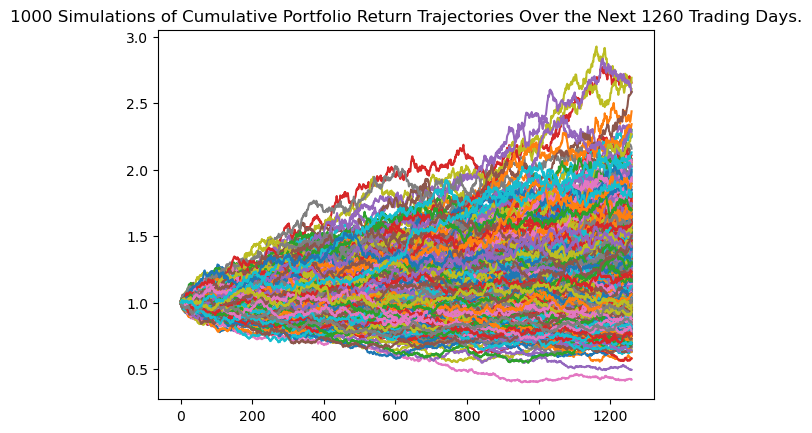

In [45]:
# Plot simulation outcomes
line_plot = MC_5yr_dist.plot_simulation()

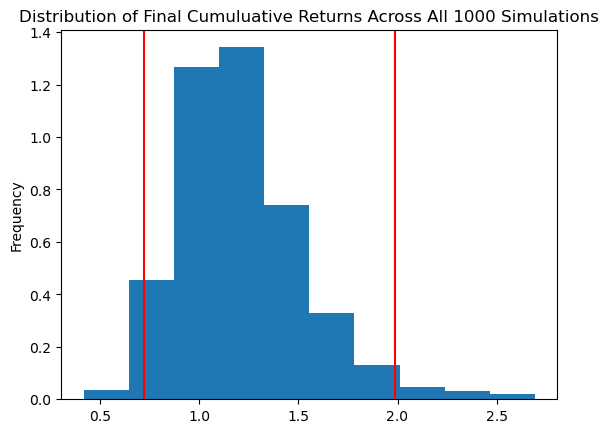

In [46]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5yr_dist.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5yr = MC_5yr_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_5yr)

count           1000.000000
mean               1.213769
std                0.320239
min                0.419872
25%                0.980611
50%                1.165659
75%                1.387376
max                2.692110
95% CI Lower       0.723376
95% CI Upper       1.987815
Name: 1260, dtype: float64


/Users/mikewenner/Desktop/Module_5_Challenge/data/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_5yr[8]*60000,2)
ci_upper_five = round(summary_5yr[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $43402.57 and $119268.89


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5, .5],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [92]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992129,1.016796,0.992258,1.003728,1.006733,0.996650,0.989214,1.003369,0.982667,0.993812,...,0.990737,0.994884,1.000662,1.007861,0.999481,1.001148,0.995680,1.007656,0.995738,1.003985
2,1.005162,1.014054,0.983773,1.002281,1.008826,0.987882,0.993328,0.996027,0.989434,0.995778,...,0.992706,0.992898,1.011712,1.007235,0.988490,0.998630,1.008436,1.006802,0.998651,1.010866
3,1.012238,1.010310,0.977586,1.004612,1.006453,0.984067,0.995191,0.994414,0.997961,0.993264,...,0.992104,0.987736,1.028264,1.007320,0.996593,0.992816,1.016474,1.007720,0.986788,1.009329
4,1.006806,1.010489,0.993472,1.010004,1.009063,0.990440,0.984354,0.987266,1.004852,0.985224,...,1.002699,0.985566,1.027571,1.008502,0.977133,0.988651,1.027624,1.010681,0.990844,1.008484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.082162,1.224965,1.234885,1.096164,1.370050,1.223588,1.944113,1.023872,1.397364,0.939471,...,1.142460,1.275419,1.425659,1.493423,1.373926,1.085474,0.895633,1.488910,1.373867,1.368334
2517,1.091552,1.212497,1.239814,1.097713,1.381471,1.228014,1.947579,1.022375,1.399938,0.935696,...,1.135355,1.276427,1.425836,1.505473,1.375248,1.087253,0.899195,1.479760,1.375682,1.360746
2518,1.099715,1.209855,1.242688,1.107003,1.391665,1.231731,1.930173,1.014686,1.392159,0.949745,...,1.125586,1.264436,1.449739,1.514417,1.380712,1.082362,0.893302,1.484256,1.399315,1.352915
2519,1.106016,1.200629,1.243149,1.106093,1.388295,1.223613,1.927536,1.012951,1.376163,0.942964,...,1.114419,1.267209,1.442364,1.513258,1.377054,1.080282,0.889955,1.476049,1.410892,1.347106


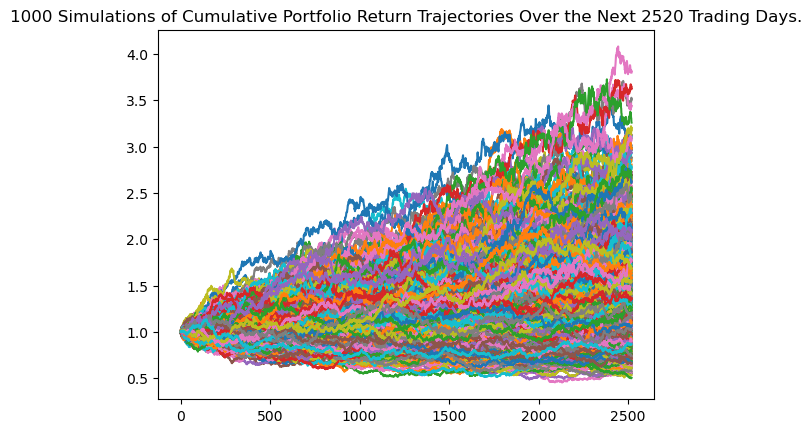

In [53]:
# Plot simulation outcomes
line_plot = MC_10yr_dist.plot_simulation()

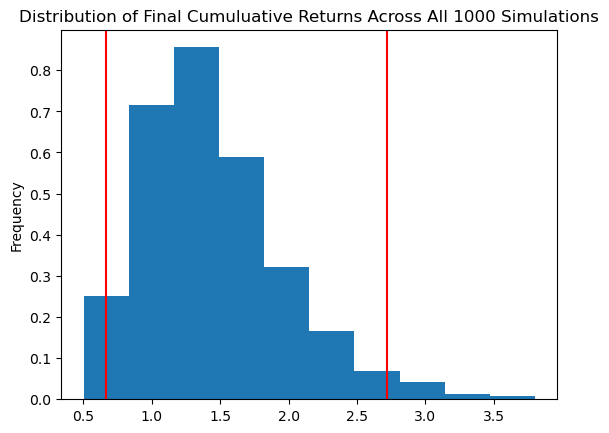

In [54]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10yr_dist.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10yr = MC_10yr_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_10yr)

count           1000.000000
mean               1.452694
std                0.521490
min                0.504730
25%                1.069917
50%                1.386697
75%                1.718436
max                3.799838
95% CI Lower       0.667514
95% CI Upper       2.720527
Name: 2520, dtype: float64


/Users/mikewenner/Desktop/Module_5_Challenge/data/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [57]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_10yr[8]*60000,2)
ci_upper_ten = round(summary_10yr[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $40050.85 and $163231.64
